# Recurrent Neural Network

Same entities repeating a certain number of times



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
train_set = dataset_train.iloc[:,1:2].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_training = sc.fit_transform(train_set)

In [6]:
x_train = []
y_train = []

In [7]:
dataset_train.shape

(1258, 6)

In [8]:
for i in range(60,1258):
    x_train.append(scaled_training[i-60:i,0])
    y_train.append(scaled_training[i,0])

In [9]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [10]:
x_train.shape

(1198, 60)

In [11]:
y_train.shape

(1198,)

In [12]:
print(x_train.ndim, y_train.ndim)

2 1


In [13]:
x_train = np.reshape(x_train,(1198,60,1))
x_train.shape

(1198, 60, 1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,LSTM,Dropout

In [15]:
model = Sequential()

In [16]:
model.add(LSTM( units = 60 ,return_sequences = True , input_shape = (60,1)))
model.add(Dropout(0.2))
model.add(LSTM( units = 60 ,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 60 , return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 60 ))
model.add(Dropout(0.2))
model.add(Dense(units =1))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.compile("rmsprop",loss = "mean_squared_error")
model.fit(x_train,y_train,epochs = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1198/1198 [==============================] - 71s 59ms/sample - loss: 0.0362


In [18]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
y_test = dataset_test.iloc[:,1:2]

In [19]:
dataset_total = pd.concat((dataset_train["Open"],dataset_test["Open"]),axis = 0)
inputs  = dataset_total[len(dataset_total)-len(dataset_test)- 60:].values
inputs = inputs.reshape(-1,1)

In [20]:
inputs = sc.fit_transform(inputs)

In [21]:
x_test = []

In [22]:
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test= np.reshape(x_test,(20,60,1))

In [23]:
ypred = model.predict(x_test)
ypred.shape
ypred = sc.inverse_transform(ypred)

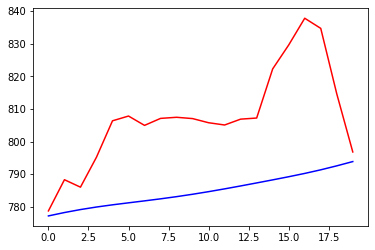

In [24]:
plt.plot(y_test, color ="red", label = "actual stock price")
plt.plot(ypred, color ="blue",label = "predicted stock price")
plt.show()

In [25]:
test= []

In [26]:
for i in range (60 ,120): 
  test.append(i)
test = np.array(test) 
test = test.reshape(-1,1)
test = np.reshape(test, (1,60,1))

In [27]:
yp = model.predict (test)

In [28]:
yp = sc.inverse_transform(yp)
yp

array([[829.24615]], dtype=float32)

In [30]:
test =  [343,456,756,678,786,456,567,343,767,123,343,456,756,678,786,456,567,343,767,123,343,456,756,678,786,456,567,343,767,123,343,456,756,678,786,456,567,343,767,123,343,456,756,678,786,456,567,343,767,123,343,456,756,678,786,456,567,343,767,123]

In [31]:
test = np.array(test) 
test = test.reshape(-1,1)
test = np.reshape(test, (1,60,1))

In [32]:
yp = model.predict (test)
yp = sc.inverse_transform(yp)
print(yp)

[[823.9726]]
